In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import time
import ml_utils
import os.path
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)
final_data = pd.read_csv('final_labelled_data.csv')

In [3]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [4]:
offer_received = transcript[transcript['event'] == 'offer received'][['person','value','time']].\
copy().reset_index(drop = True)


In [5]:
offer_received.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76277 entries, 0 to 76276
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  76277 non-null  object
 1   value   76277 non-null  object
 2   time    76277 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
offer_received[['person','time']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76277 entries, 0 to 76276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  76277 non-null  object
 1   time    76277 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
offer_received['offer_id'] = offer_received['value'].apply(lambda x: x.get('offer id'))
offer_received.head()

,person,value,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [8]:
portfolio.rename(columns = {'id' : 'offer_id'},inplace = True)
offer_received = pd.merge(offer_received,portfolio[['offer_id','duration']],on = 'offer_id')

In [9]:
offer_received.head()

,person,value,time,offer_id,duration
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7
1,ebe7ef46ea6f4963a7dd49f501b26779,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7
2,f082d80f0aac47a99173ba8ef8fc1909,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7
3,c0d210398dee4a0895b24444a5fcd1d2,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7
4,57dd18ec5ddc46828afb81ec5977bef2,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7


In [10]:
offer_received['time_max'] = offer_received['time'] + offer_received['duration'] * 24
offer_received.head()

,person,value,time,offer_id,duration,time_max
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7,168
1,ebe7ef46ea6f4963a7dd49f501b26779,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7,168
2,f082d80f0aac47a99173ba8ef8fc1909,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7,168
3,c0d210398dee4a0895b24444a5fcd1d2,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7,168
4,57dd18ec5ddc46828afb81ec5977bef2,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,7,168


In [11]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [12]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [13]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [14]:
#transcript['value'] = transcript['value'].astype(str)

In [15]:
transcript["id"] = transcript.index + 1

In [16]:
transcript.head()

,person,event,value,time,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,2
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,3
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,5


In [17]:
transcript[['person','time','event']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303572 entries, 0 to 306533
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  303572 non-null  object
 1   time    303572 non-null  int64 
 2   event   303572 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.3+ MB


In [18]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [19]:
transcript['transaction_flag'] = np.where(transcript['event'] == 'transaction',1,0)
transcript['offer_rflag'] = np.where(transcript['event'] == 'offer received',1,0)
transcript['offer_vflag'] = np.where(transcript['event'] == 'offer viewed',1,0)
transcript['offer_cflag'] = np.where(transcript['event'] == 'offer completed',1,0)
transcript.head()

,person,event,value,time,id,transaction_flag,offer_rflag,offer_vflag,offer_cflag
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,2,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,3,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,4,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,5,0,1,0,0


In [20]:
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount'))
transcript['amount'] = np.where(transcript['transaction_flag'] == 1,transcript['amount'],0)

In [21]:
transcript.head()

,person,event,value,time,id,transaction_flag,offer_rflag,offer_vflag,offer_cflag,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,1,0,0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,2,0,1,0,0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,3,0,1,0,0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,4,0,1,0,0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,5,0,1,0,0,0.0


In [22]:
transcript['amount'].max()

1062.28

In [23]:
#transaction_offer_flag
id_join = pd.merge(transcript,
                      offer_received[['person','time','time_max']].rename(columns = {'time' : 'time_min'}),
                      how = 'left',on = 'person')
id_join['transaction_offer_flag'] = np.where((id_join['time'] <= id_join['time_max']) & 
                                               (id_join['time'] >= id_join['time_min']),
                                               1,0)
id_join['transaction_offer_flag'] = np.where((id_join['event'] == 'transaction') & 
                                                (id_join['transaction_offer_flag'] == 1)
                                                ,1,0)
id_join = id_join.groupby('id',as_index = False)['transaction_offer_flag'].max()
transcript = pd.merge(transcript,id_join, on = 'id')
transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   person                  306534 non-null  object 
 1   event                   306534 non-null  object 
 2   value                   306534 non-null  object 
 3   time                    306534 non-null  int64  
 4   id                      306534 non-null  int64  
 5   transaction_flag        306534 non-null  int64  
 6   offer_rflag             306534 non-null  int64  
 7   offer_vflag             306534 non-null  int64  
 8   offer_cflag             306534 non-null  int64  
 9   amount                  306534 non-null  float64
 10  transaction_offer_flag  306534 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 28.1+ MB


In [24]:
transcript['amount_offer'] = np.where(transcript['transaction_offer_flag'] == 1,
                                     transcript['amount'],0)
transcript['amount_offer'].min()

0.0

In [25]:
transcript[transcript['event'] == 'transaction']['transaction_offer_flag'].value_counts()

1    121863
0     17090
Name: transaction_offer_flag, dtype: int64

In [26]:
transcript[['event','person','time','amount','transaction_offer_flag']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303572 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event                   303572 non-null  object 
 1   person                  303572 non-null  object 
 2   time                    303572 non-null  int64  
 3   amount                  303572 non-null  float64
 4   transaction_offer_flag  303572 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.9+ MB


In [27]:
final_data.head()

,person,offer_id,time,label,day
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,0,24.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336,0,14.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,7.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408,0,17.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504,0,21.0


In [28]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59083 entries, 0 to 59082
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   person    59083 non-null  object 
 1   offer_id  59083 non-null  object 
 2   time      59083 non-null  int64  
 3   label     59083 non-null  int64  
 4   day       59083 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [29]:

final_data[['person','time']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59083 entries, 0 to 59082
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  59083 non-null  object
 1   time    59083 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [30]:
final_data[['person','day']].drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59083 entries, 0 to 59082
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   person  59083 non-null  object 
 1   day     59083 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [31]:
def agg_func(transcript,final_data,col):
    transaction_count = transcript.groupby(['person','time'], as_index = False)[col].sum()
    transaction_count['number_' + col] = transaction_count.groupby(['person'])[col].shift(1)
    print(transaction_count.head())
    transaction_count['number_' + col] = transaction_count.groupby(['person'])['number_' + col].cumsum()
    print(transaction_count.head())
    print(transaction_count['number_' + col].max())
    final_data = pd.merge(final_data,
                      transaction_count[['person','time','number_' + col]],
                      how = 'left',on = ['person','time'])
    return final_data

In [32]:
final_data = agg_func(transcript,final_data,'transaction_flag')
final_data = agg_func(transcript,final_data,'offer_rflag')
final_data = agg_func(transcript,final_data,'offer_vflag')
final_data = agg_func(transcript,final_data,'offer_cflag')
final_data = agg_func(transcript,final_data,'transaction_offer_flag')
final_data = agg_func(transcript,final_data,'amount')
final_data = agg_func(transcript,final_data,'amount_offer')

                             person  time  transaction_flag  \
0  0009655768c64bdeb2e877511632db8f   168                 0   
1  0009655768c64bdeb2e877511632db8f   192                 0   
2  0009655768c64bdeb2e877511632db8f   228                 1   
3  0009655768c64bdeb2e877511632db8f   336                 0   
4  0009655768c64bdeb2e877511632db8f   372                 0   

   number_transaction_flag  
0                      NaN  
1                      0.0  
2                      0.0  
3                      1.0  
4                      0.0  
                             person  time  transaction_flag  \
0  0009655768c64bdeb2e877511632db8f   168                 0   
1  0009655768c64bdeb2e877511632db8f   192                 0   
2  0009655768c64bdeb2e877511632db8f   228                 1   
3  0009655768c64bdeb2e877511632db8f   336                 0   
4  0009655768c64bdeb2e877511632db8f   372                 0   

   number_transaction_flag  
0                      NaN  
1         

In [33]:
final_data.head()

,person,offer_id,time,label,day,number_transaction_flag,number_offer_rflag,number_offer_vflag,number_offer_cflag,number_transaction_offer_flag,number_amount,number_amount_offer
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,0,24.0,4.0,4.0,4.0,2.0,4.0,58.40,58.40
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336,0,14.0,1.0,1.0,1.0,0.0,1.0,22.16,22.16
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408,0,17.0,1.0,2.0,2.0,0.0,1.0,22.16,22.16
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504,0,21.0,2.0,3.0,3.0,1.0,2.0,30.73,30.73


In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59083 entries, 0 to 59082
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person                         59083 non-null  object 
 1   offer_id                       59083 non-null  object 
 2   time                           59083 non-null  int64  
 3   label                          59083 non-null  int64  
 4   day                            59083 non-null  float64
 5   number_transaction_flag        47831 non-null  float64
 6   number_offer_rflag             47831 non-null  float64
 7   number_offer_vflag             47831 non-null  float64
 8   number_offer_cflag             47831 non-null  float64
 9   number_transaction_offer_flag  47831 non-null  float64
 10  number_amount                  47831 non-null  float64
 11  number_amount_offer            47831 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usag

In [35]:
final_data['label'].value_counts()

0    37711
1    21372
Name: label, dtype: int64

In [36]:
final_data['offer_amount_ratio'] = final_data['number_amount_offer']/final_data['number_amount']
final_data['offer_complete_ratio'] = final_data['number_offer_cflag']/final_data['number_offer_rflag']

In [37]:
final_data['offer_amount_ratio'].value_counts()

1.000000    22558
0.000000     4551
0.333333        5
0.731293        5
0.145177        4
            ...  
0.413897        1
0.026136        1
0.715613        1
0.870482        1
0.185030        1
Name: offer_amount_ratio, Length: 13246, dtype: int64

In [38]:
final_data = final_data.fillna(0).reset_index(drop = True)
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [39]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [40]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [41]:
#profile = profile.dropna().reset_index(drop = True)
profile['gender'] = profile['gender'].fillna('O')
profile['age']=profile['age'].apply(lambda x: np.nan if x==118 else x)
fill_median = profile[profile['gender'] == 'O'].groupby('gender',as_index = False)['age'].median()['age'].values[0]
profile['age'] = profile['age'].fillna(fill_median)
fill_median = profile[profile['gender'] == 'O'].groupby('gender',as_index = False)['income'].median()['income'].values[0]
profile['income'] = profile['income'].fillna(fill_median)
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format = '%Y%m%d')

In [42]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            17000 non-null  object        
 1   age               17000 non-null  float64       
 2   id                17000 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            17000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 664.2+ KB


In [43]:
profile['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

In [44]:
profile['gender'].value_counts()

M    8484
F    6129
O    2387
Name: gender, dtype: int64

In [45]:
profile['membership_days'] = (profile['became_member_on'].max().date() -  profile['became_member_on'].dt.date).dt.days

In [46]:
profile.head()

,gender,age,id,became_member_on,income,membership_days
0,O,55.0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,62000.0,529
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,376
2,O,55.0,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,62000.0,14
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,443
4,O,55.0,a03223e636434f42ac4c3df47e8bac43,2017-08-04,62000.0,356


In [47]:
profile.max()

gender                                             O
age                                              101
id                  ffff82501cea40309d5fdd7edcca4a07
became_member_on                 2018-07-26 00:00:00
income                                        120000
membership_days                                 1823
dtype: object

In [48]:
dummy=pd.get_dummies(profile['gender'],columns='gender',prefix='gender')
profile = pd.concat([profile,dummy],axis=1)
profile = profile.drop(['became_member_on','gender'],axis = 1)

In [49]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [50]:
portfolio['number_channels'] = portfolio['channels'].apply(lambda x: len(x))
portfolio['web_flag'] = portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
portfolio['mobile_flag'] = portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio['social_flag'] = portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
portfolio['difficulty_ratio'] = portfolio['difficulty']/portfolio['duration']
portfolio['reward_ratio'] = np.where(portfolio['difficulty'] ==0,0,portfolio['reward']/portfolio['difficulty'])
#one hot encoding the origin variable
dummy=pd.get_dummies(portfolio['offer_type'],columns='offer_type',prefix='offer_type')
portfolio=pd.concat([portfolio,dummy],axis=1)
portfolio=portfolio.drop(['offer_type','channels'],axis=1)

In [51]:
portfolio.head()

,reward,difficulty,duration,offer_id,number_channels,web_flag,mobile_flag,social_flag,difficulty_ratio,reward_ratio,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,3,0,1,1,1.428571,1.00,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,4,1,1,1,2.000000,1.00,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,3,1,1,0,0.000000,0.00,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,1,1,0,0.714286,1.00,1,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,2,1,0,0,2.000000,0.25,0,1,0


In [52]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   reward                    10 non-null     int64  
 1   difficulty                10 non-null     int64  
 2   duration                  10 non-null     int64  
 3   offer_id                  10 non-null     object 
 4   number_channels           10 non-null     int64  
 5   web_flag                  10 non-null     int64  
 6   mobile_flag               10 non-null     int64  
 7   social_flag               10 non-null     int64  
 8   difficulty_ratio          10 non-null     float64
 9   reward_ratio              10 non-null     float64
 10  offer_type_bogo           10 non-null     uint8  
 11  offer_type_discount       10 non-null     uint8  
 12  offer_type_informational  10 non-null     uint8  
dtypes: float64(2), int64(7), object(1), uint8(3)
memory usage: 958.0+ by

In [53]:
final_data.head()

,person,offer_id,time,label,day,number_transaction_flag,number_offer_rflag,number_offer_vflag,number_offer_cflag,number_transaction_offer_flag,number_amount,number_amount_offer,offer_amount_ratio,offer_complete_ratio
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,0,24.0,4.0,4.0,4.0,2.0,4.0,58.40,58.40,1.0,0.500000
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336,0,14.0,1.0,1.0,1.0,0.0,1.0,22.16,22.16,1.0,0.000000
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,7.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000000
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408,0,17.0,1.0,2.0,2.0,0.0,1.0,22.16,22.16,1.0,0.000000
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504,0,21.0,2.0,3.0,3.0,1.0,2.0,30.73,30.73,1.0,0.333333


In [54]:
profile.rename(columns = {'id':'person'},inplace = True)
final_data = final_data.merge(profile,how = 'left', on = 'person').\
merge(portfolio,how = 'left', on = 'offer_id')

In [55]:
final_data.head()

,person,offer_id,time,label,day,number_transaction_flag,number_offer_rflag,number_offer_vflag,number_offer_cflag,number_transaction_offer_flag,...,duration,number_channels,web_flag,mobile_flag,social_flag,difficulty_ratio,reward_ratio,offer_type_bogo,offer_type_discount,offer_type_informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,0,24.0,4.0,4.0,4.0,2.0,4.0,...,7,3,1,1,0,1.428571,0.2,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336,0,14.0,1.0,1.0,1.0,0.0,1.0,...,4,3,1,1,0,0.000000,0.0,0,0,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,7.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,1,1,0.000000,0.0,0,0,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408,0,17.0,1.0,2.0,2.0,0.0,1.0,...,5,4,1,1,1,1.000000,1.0,1,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504,0,21.0,2.0,3.0,3.0,1.0,2.0,...,10,4,1,1,1,1.000000,0.2,0,1,0


In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59083 entries, 0 to 59082
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person                         59083 non-null  object 
 1   offer_id                       59083 non-null  object 
 2   time                           59083 non-null  int64  
 3   label                          59083 non-null  int64  
 4   day                            59083 non-null  float64
 5   number_transaction_flag        59083 non-null  float64
 6   number_offer_rflag             59083 non-null  float64
 7   number_offer_vflag             59083 non-null  float64
 8   number_offer_cflag             59083 non-null  float64
 9   number_transaction_offer_flag  59083 non-null  float64
 10  number_amount                  59083 non-null  float64
 11  number_amount_offer            59083 non-null  float64
 12  offer_amount_ratio             59083 non-null 

In [57]:
#splitting into train and test
from sklearn.model_selection import train_test_split
#X=final_data.drop(['customer_id','is_returning_customer'],axis=1)
y=final_data['label']
df_train,df_test=train_test_split(final_data, test_size=0.33,random_state=0,stratify = y)
X_train = df_train.drop(['person','offer_id','time','day','label'],axis = 1)
y_train = df_train['label']
X_test = df_test.drop(['person','offer_id','time','day','label'],axis = 1)
y_test = df_test['label']

In [58]:
df_test['label'].value_counts()

0    12445
1     7053
Name: label, dtype: int64

In [59]:
12445/7053

1.764497377002694

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, make_scorer
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label=1)
param_search = {'max_depth': [5,8],
                'max_features': [0.5,0.8],
                'n_estimators': [100, 400],
                'min_samples_leaf': [10],
                'random_state': [42],
                'class_weight' : [{1:2,0:1}]}

filename = 'finalized_model_rf.sav'
base_path = Path.cwd()

path = base_path.joinpath(filename)
if os.path.exists(path):
    clf = pickle.load(open(filename, 'rb'))
else:
    #grid search hyperparameter tuning imported from ml_utils.py
    clf = ml_utils.random_forest_model(X_train, y_train, cross_validation=True, n_splits=3, param_search=param_search, scoring=custom_scorer)
    pickle.dump(clf, open(filename, 'wb'))


clf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8, max_features=0.5,
                       min_samples_leaf=10, n_estimators=400, random_state=42)

In [61]:
y_predicted=clf.predict(X_test)
print("Train score : ",clf.score(X_train,y_train))
print("Test score : ", clf.score(X_test,y_test))

Train score :  0.7670077049387394
Test score :  0.7613088521899682


In [62]:
#Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.91      0.70      0.79     12445
           1       0.62      0.87      0.73      7053

    accuracy                           0.76     19498
   macro avg       0.76      0.79      0.76     19498
weighted avg       0.80      0.76      0.77     19498



In [63]:
from sklearn.metrics import roc_auc_score
print("AUC score is %s" % (roc_auc_score(y_test, clf.predict_proba(X_test.values)[:, 1])))

AUC score is 0.868872487406235


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[8702, 3743],
       [ 911, 6142]])

In [65]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Information Gain'})
importances = importances.sort_values(by='Information Gain',ascending=False)
importances

,Information Gain
reward,0.105976
difficulty_ratio,0.102593
reward_ratio,0.093406
duration,0.093212
difficulty,0.089643
membership_days,0.081227
offer_type_informational,0.076226
number_amount,0.069476
number_channels,0.061761
income,0.044096


Text(0.5, 1.0, ' Feature Importance')

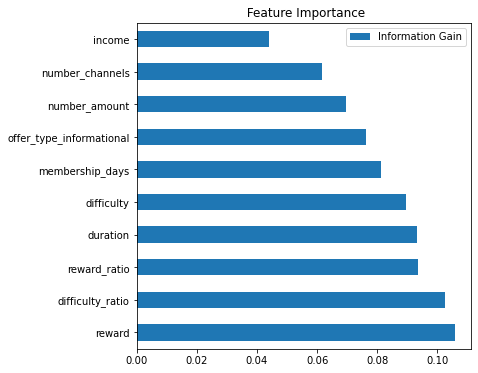

In [66]:
fig,axes = plt.subplots(figsize =(6,6))
importances.head(10).plot(kind='barh', ax = axes)
axes.set_title(" Feature Importance")

In [67]:
df_test = df_test.reset_index(drop = True).copy()
df_test['y_predicted'] = y_predicted
df_test['mis_classified'] = np.where(df_test['y_predicted'] != df_test['label'],1,0)
df_test = df_test[df_test['label'] == 0].reset_index(drop = True)

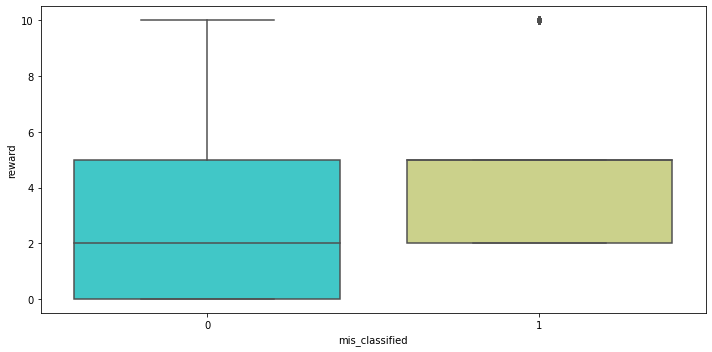

In [68]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=df_test,x='mis_classified',y='reward',palette='rainbow')
plt.tight_layout()

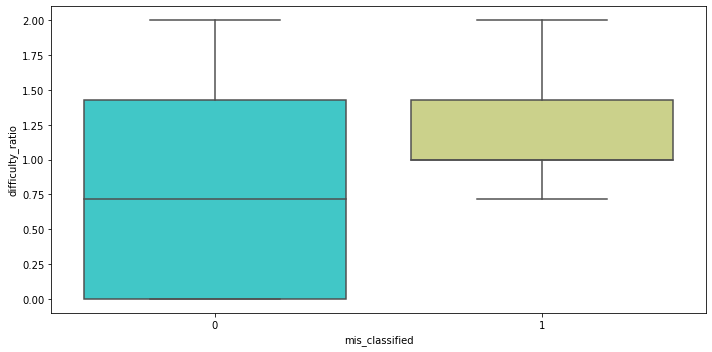

In [69]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=df_test,x='mis_classified',y='difficulty_ratio',palette='rainbow')
plt.tight_layout()

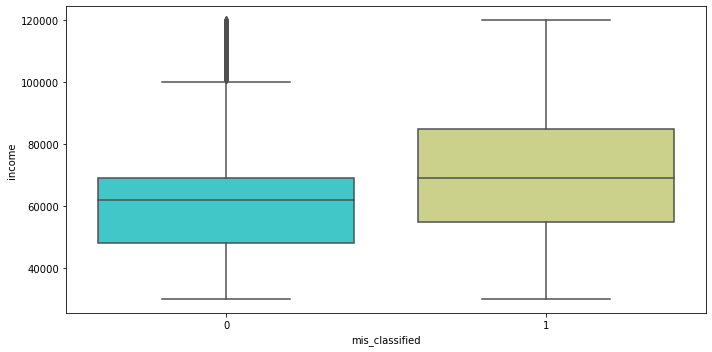

In [70]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=df_test,x='mis_classified',y='income',palette='rainbow')
plt.tight_layout()

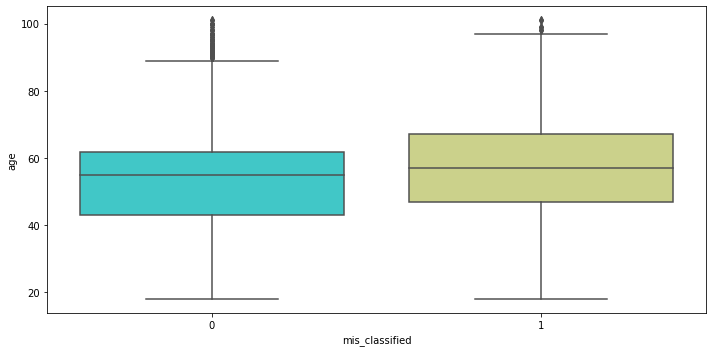

In [71]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=df_test,x='mis_classified',y='age',palette='rainbow')
plt.tight_layout()

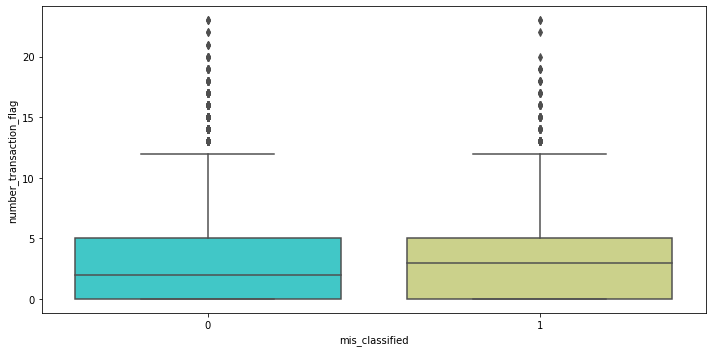

In [72]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=df_test,x='mis_classified',y='number_transaction_flag',palette='rainbow')
plt.tight_layout()

In [73]:
offer_completed= transcript[transcript['event'] == 'offer completed'][['person','value','time']].copy().reset_index(drop = True)
offer_completed['offer_id'] = offer_completed['value'].apply(lambda x: x.get('offer_id'))

In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12445 entries, 0 to 12444
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person                         12445 non-null  object 
 1   offer_id                       12445 non-null  object 
 2   time                           12445 non-null  int64  
 3   label                          12445 non-null  int64  
 4   day                            12445 non-null  float64
 5   number_transaction_flag        12445 non-null  float64
 6   number_offer_rflag             12445 non-null  float64
 7   number_offer_vflag             12445 non-null  float64
 8   number_offer_cflag             12445 non-null  float64
 9   number_transaction_offer_flag  12445 non-null  float64
 10  number_amount                  12445 non-null  float64
 11  number_amount_offer            12445 non-null  float64
 12  offer_amount_ratio             12445 non-null 

In [75]:
df_test = df_test[df_test['mis_classified'] == 1].reset_index(drop = True).copy()
df_test['label'].value_counts()

0    3743
Name: label, dtype: int64

In [76]:
offer_completed.head()

,person,value,time,offer_id
0,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,2906b810c7d4411798c6938adc9daaa5
1,fe97aa22dd3e48c8b143116a8403dd52,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,fafdcd668e3743c1bb461111dcafc2a4
2,629fc02d56414d91bca360decdfa9288,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,676506bad68e4161b9bbaffeb039626b,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0,ae264e3637204a6fb9bb56bc8210ddfd
4,8f7dd3b2afe14c078eb4f6e6fe4ba97d,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [79]:
df_test.join(offer_completed[['person','offer_id','time']],on = ['person','offer_id','time'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [81]:
pd.merge(df_test,offer_completed,how = 'inner',on = ['person','offer_id','time']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person                         282 non-null    object 
 1   offer_id                       282 non-null    object 
 2   time                           282 non-null    int64  
 3   label                          282 non-null    int64  
 4   day                            282 non-null    float64
 5   number_transaction_flag        282 non-null    float64
 6   number_offer_rflag             282 non-null    float64
 7   number_offer_vflag             282 non-null    float64
 8   number_offer_cflag             282 non-null    float64
 9   number_transaction_offer_flag  282 non-null    float64
 10  number_amount                  282 non-null    float64
 11  number_amount_offer            282 non-null    float64
 12  offer_amount_ratio             282 non-null    flo

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person                         3743 non-null   object 
 1   offer_id                       3743 non-null   object 
 2   time                           3743 non-null   int64  
 3   label                          3743 non-null   int64  
 4   day                            3743 non-null   float64
 5   number_transaction_flag        3743 non-null   float64
 6   number_offer_rflag             3743 non-null   float64
 7   number_offer_vflag             3743 non-null   float64
 8   number_offer_cflag             3743 non-null   float64
 9   number_transaction_offer_flag  3743 non-null   float64
 10  number_amount                  3743 non-null   float64
 11  number_amount_offer            3743 non-null   float64
 12  offer_amount_ratio             3743 non-null   f